In [51]:
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
df = pd.read_csv('odisea.csv')

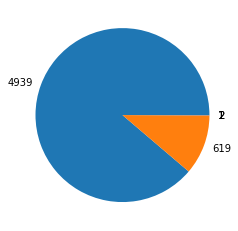

In [53]:
#Ejercicio 1.  ¿Cuál es la frecuencia de cada una de las categorías de la columna sex? #radius (tamaño piechart)
ej_1 = df['sex_'].value_counts()
plt.figure()

plt.pie(ej_1, labels= ej_1)
plt.show()

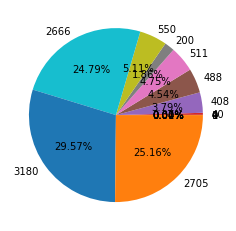

In [54]:
# Ejercicio 2.¿Cuál es el porcentaje de nulos por columna? 
ej_2 = df.isnull().sum()

plt.figure()

plt.pie(ej_2, labels= ej_2, autopct='%1.2f%%')
plt.show()


In [55]:
# 3. ¿Cuál es número total de valores únicos de cada una de las columnas categóricas del dataframe?
df_3_unique = df.describe(include= 'object').T.reset_index()
df_3_unique

,index,count,unique,top,freq
0,case_number,6113,6113,2018.06.25,1
1,type,6110,8,Unprovoked,4438
2,country,6074,201,USA,2200
3,area,5706,791,Florida,1025
4,location,5626,4020,"New Smyrna Beach, Volusia County",162
5,activity,5603,1484,Surfing,966
6,name,5914,5118,male,511
7,sex_,5564,6,M,4939
8,age,3448,156,17,154
9,time,2934,366,Afternoon,183


In [56]:
# este sería el total de valores únicos por cada variable categórica
df_3_unique[["unique", "index"]]

,unique,index
0,6113,case_number
1,8,type
2,201,country
3,791,area
4,4020,location
5,1484,activity
6,5118,name
7,6,sex_
8,156,age
9,366,time


In [57]:
df_3_unique.head()

,index,count,unique,top,freq
0,case_number,6113,6113,2018.06.25,1
1,type,6110,8,Unprovoked,4438
2,country,6074,201,USA,2200
3,area,5706,791,Florida,1025
4,location,5626,4020,"New Smyrna Beach, Volusia County",162


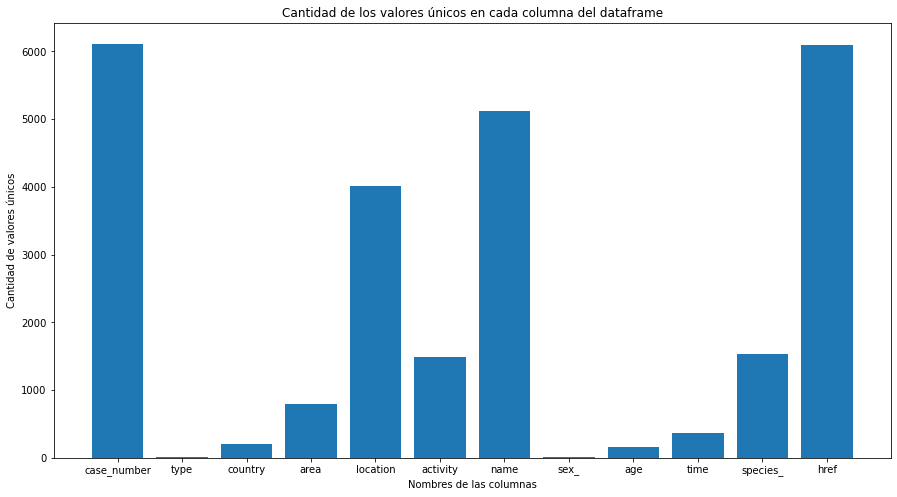

In [58]:
#gráfico
y2 = df_3_unique["unique"]
x2 = df_3_unique["index"]

plt.figure(figsize=(15,8))
plt.bar(x2,y2)
plt.xlabel("Nombres de las columnas")
plt.ylabel("Cantidad de valores únicos")
plt.title("Cantidad de los valores únicos en cada columna del dataframe")

plt.show()


In [59]:
#4. Filtrad los datos para quedarnos solo con los datos de USA.¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? 
# Muestra solo los que hayan ocurrido del 2000 en adelante

df_usa = df[df["country"] == "USA"]
df_usa.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [60]:
#filtramos los años de ataques a partir de 2000 (solo en USA)
df_usa_2000 = df_usa[df_usa["year"] > 2000.0]
df_usa_2000.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [61]:
df_num_ataques_usa2000 = df_usa_2000.value_counts().reset_index()
df_num_ataques_usa2000.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,0
0,2001.04.05,2001.0,Unprovoked,USA,Florida,"Bethune Beach, south of New Smyrna Beach, Volu...",Standing alongside surfboard,Jason Bartholem,M,26,14h45,"""small shark""",http://sharkattackfile.net/spreadsheets/pdf_di...,1
1,2012.06.26.c,2012.0,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Swimming,Nickolaus Bieber,M,6,19h00,possibly a bull shark,http://sharkattackfile.net/spreadsheets/pdf_di...,1


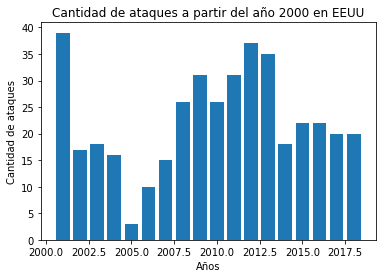

In [62]:
#gráfico 1

x = df_num_ataques_usa2000["year"].unique()               
y = df_num_ataques_usa2000["year"].value_counts()         

plt.figure()
plt.bar(x,y)
plt.xlabel("Años")
plt.ylabel("Cantidad de ataques")
plt.title("Cantidad de ataques a partir del año 2000 en EEUU")
plt.show()

In [63]:
# Ejercicio 4. Parte 2. En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.
df_usa.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [64]:
df_usa["type"].value_counts()

Unprovoked      1697
Provoked         205
Invalid          191
Boating           52
Sea Disaster      32
Boat              23
Name: type, dtype: int64

In [65]:
df_usa["type"].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Boat',
       'Sea Disaster'], dtype=object)

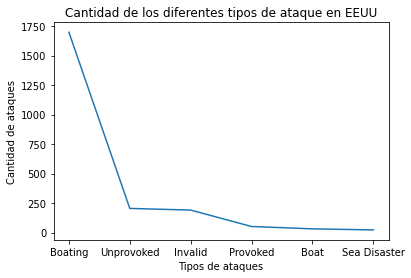

In [66]:
#gráfico

y = df_usa["type"].value_counts()                  
x = df_usa["type"].unique()

plt.figure()
plt.plot(x,y)
plt.xlabel("Tipos de ataques")
plt.ylabel("Cantidad de ataques")
plt.title("Cantidad de los diferentes tipos de ataque en EEUU")
plt.show()



In [67]:
# Ejercicio 5. Filtrado los datos para España
# ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

df_spain = df[df["country"] == "SPAIN"]
df_spain.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
82,2017.09.16.b,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...


In [68]:
#número de ataques en España a partir del 2000
df_spain_2000 = df_spain[df_spain["year"] > 2000.0]
df_spain_2000.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
82,2017.09.16.b,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...


In [69]:
df_spain_2000["year"].value_counts()

2017.0    4
2014.0    4
2016.0    2
2015.0    2
2013.0    1
2010.0    1
2009.0    1
2006.0    1
Name: year, dtype: int64

In [70]:
df_spain_2000["year"].unique()

array([2017., 2016., 2015., 2014., 2013., 2010., 2009., 2006.])

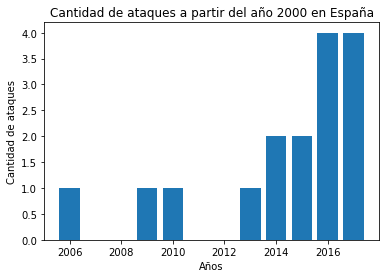

In [71]:
#gráfico
# x : años
# y : nº de casos por tipo

x3= df_spain_2000["year"].unique()
y3= df_spain_2000["year"].value_counts()

plt.figure()
plt.bar(x3,y3)
plt.xlabel("Años")
plt.ylabel("Cantidad de ataques")
plt.title("Cantidad de ataques a partir del año 2000 en España")
plt.show()


In [72]:
#En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.
df_spain.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
82,2017.09.16.b,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...


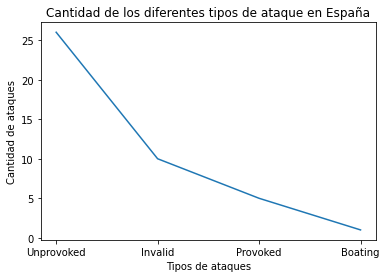

In [73]:
#gráfico

y = df_spain["type"].value_counts()                  
x = df_spain["type"].unique()

plt.figure()
plt.plot(x,y)
plt.xlabel("Tipos de ataques")
plt.ylabel("Cantidad de ataques")
plt.title("Cantidad de los diferentes tipos de ataque en España")
plt.show()
